In [1]:
# Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold   
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from boruta import BorutaPy
import lightgbm as lgb
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import matthews_corrcoef

In [2]:
df = pd.read_csv('Data - Parkinsons.csv') # Load the dataset

## Understanding the dataset attributes

In [5]:
df.sample(5) # using sample instead of head / tail

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
69,phon_R01_S18_4,148.090,162.824,67.343,0.00762,0.00005,0.00467,0.00354,0.01400,0.05428,...,0.10070,0.02431,21.718,1,0.487407,0.727313,-6.261141,0.120956,2.137075,0.141958
103,phon_R01_S25_1,150.258,154.609,75.349,0.00248,0.00002,0.00105,0.00136,0.00315,0.01131,...,0.01567,0.00495,26.759,1,0.296888,0.722356,-6.878393,0.089267,2.004055,0.113942
146,phon_R01_S35_1,169.774,191.759,151.451,0.01568,0.00009,0.00863,0.00946,0.02589,0.08143,...,0.11411,0.07530,12.359,1,0.561610,0.793509,-3.297668,0.414758,3.413649,0.457533
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728


In [63]:
# Check for null values
print("Null Values Check\n")
print(df.isnull().sum())
print("\n\n NAN Values Check \n")
print(df.isna().sum())   # no null or missing values

Null Values Check

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


 NAN Values Check 

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0


In [64]:
sum(df.duplicated()) # no duplicates

0

In [65]:
df.info()  # 195 entries in 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

#### 'name' as a column of categorical values is not going to affect model preparation as we will drop it. As the other values are float type, the dataset is ready for use without any special label encoding. 'status' is either 0 or 1.

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


<b>name</b> - ASCII subject name and recording number - We can ignore it as it has no impact on our analysis.

<b>MDVP:Fo(Hz)</b> - Average vocal fundamental frequency

<b>MDVP:Fhi(Hz)</b> - Maximum vocal fundamental frequency

<b>MDVP:Flo(Hz)</b> - Minimum vocal fundamental frequency

<b>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP </b>- Several measures of variation in fundamental frequency

<b>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA</b> - Several measures of variation in amplitude

<b>NHR,HNR - Two measures of ratio of noise to tonal components in the voice
    
<b>status</b>- Health status of the subject (one) - Parkinson's, (zero) - healthy. This is the target variable of our models.
        
<b>RPDE,D2</b> - Two nonlinear dynamical complexity measures
    
<b>DFA</b> - Signal fractal scaling exponent
    
<b>spread1,spread2,PPE</b> - Three nonlinear measures of fundamental frequency variation. Spread 1 comprises entirely negative values.


#### Clearly, the dataset will benefit from scaling.  This will be carried out later.

In [3]:
df.drop('name',axis=1,inplace=True) # Dropping the column 'name'

## Attribute Analysis

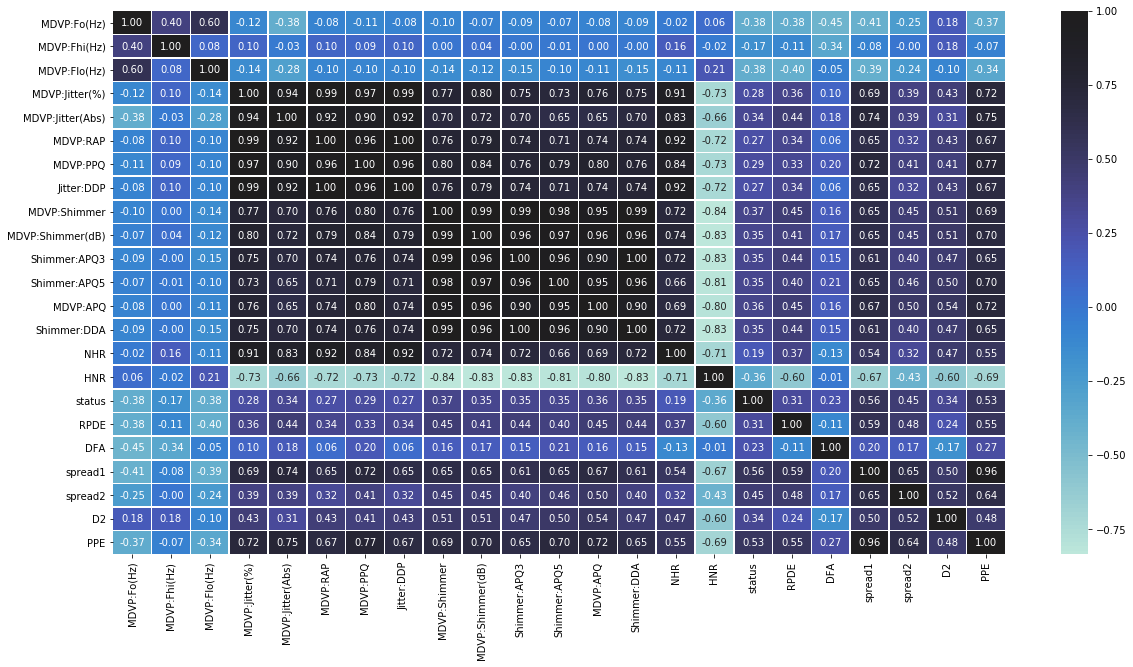

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f', center = 1 )  
plt.show()

In [74]:
# Studying correlation between 'status' and other columns
correlation_status=df.corr()['status']
correlation_status.abs().sort_values(ascending=False)

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64

In [55]:
x = df.drop('status',axis=1) # x axis without the target variable     
y = df['status']   # target variable on y axis
x_norm = MinMaxScaler().fit_transform(x)  # chi2 test for Categorical Features
chi_selector = SelectKBest(chi2, k=15)
chi_selector.fit(x_norm, y)
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

15 selected features


['MDVP:Fo(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'spread1',
 'spread2',
 'PPE']

In [43]:
def cor_selector(x, y,num_feats):  # For numerical features
    cor_list = []
    feature_name = x.columns.tolist()
    # calculate the correlation with y for each feature
    for i in x.columns.tolist():
        cor = np.corrcoef(x[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = x.iloc[:,np.argsort(np.abs(cor_list))[-10:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(x, y,15)
print(str(len(cor_feature)), 'selected features')
cor_feature

10 selected features


['MDVP:Shimmer(dB)',
 'Shimmer:APQ5',
 'HNR',
 'MDVP:APQ',
 'MDVP:Shimmer',
 'MDVP:Flo(Hz)',
 'MDVP:Fo(Hz)',
 'spread2',
 'PPE',
 'spread1']

In [44]:
rfe_selector = RFE(estimator=AdaBoostClassifier(), n_features_to_select=15, step=10, verbose=0)
rfe_selector.fit(x_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

15 selected features


['MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(Abs)',
 'Jitter:DDP',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread2',
 'D2',
 'PPE']

<function matplotlib.pyplot.show(close=None, block=None)>

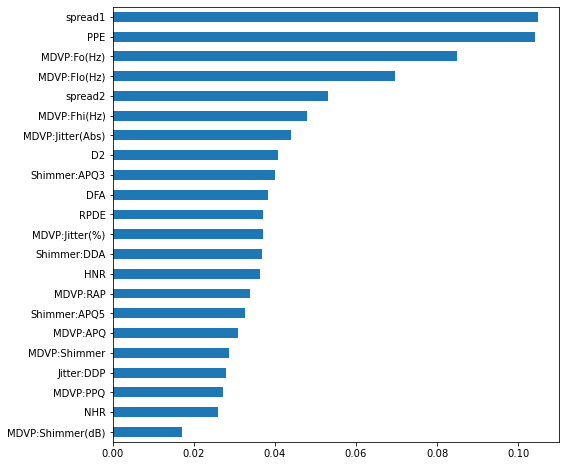

In [45]:
x = df.drop('status',axis=1) # x axis without the target variable     
y = df['status']   # target variable on y axis
XT = ExtraTreesClassifier()  # Identifying features with low importance
XT.fit(x,y)
feat_importances = pd.Series(XT.feature_importances_, index=x.columns)
plt.rcParams['figure.figsize'] = (8,8)
feat_importances.nsmallest(22).plot(kind='barh')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

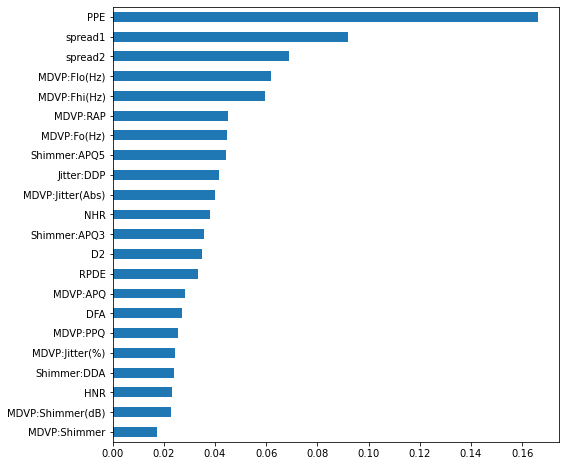

<Figure size 576x576 with 0 Axes>

In [21]:
RF = RandomForestClassifier()
RF.fit(x,y)
feat_importances = pd.Series(RF.feature_importances_, index=x.columns)
plt.rcParams['figure.figsize'] = (8,8)
feat_importances.nsmallest(22).plot(kind='barh')
plt.figure(figsize=(8,8))
plt.show

In [46]:
from sklearn.feature_selection import SelectFromModel

embeded_RF_selector = SelectFromModel(RF, max_features=22)
embeded_RF_selector.fit(x, y)
embeded_RF_support = embeded_RF_selector.get_support()
embeded_RF_feature = x.loc[:,embeded_RF_support].columns.tolist()

embeded_XT_selector = SelectFromModel(XT, max_features=22)
embeded_XT_selector.fit(x, y)
embeded_XT_support = embeded_XT_selector.get_support()
embeded_XT_feature = x.loc[:,embeded_XT_support].columns.tolist()


In [47]:
# Putting all selections together
feature_selection_df = pd.DataFrame({'Feature':x.columns, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 
                                    'Random Forest':embeded_RF_support, 'Extra Trees':embeded_XT_support})

feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(22)

,Feature,Pearson,Chi-2,RFE,Random Forest,Extra Trees,Total
1,spread2,True,True,True,True,True,5
2,PPE,True,True,True,True,True,5
3,MDVP:Fo(Hz),True,True,True,True,True,5
4,spread1,True,True,False,True,True,4
5,MDVP:Flo(Hz),True,True,True,False,True,4
6,Shimmer:APQ5,True,True,True,False,False,3
7,MDVP:Jitter(Abs),False,True,True,False,True,3
8,MDVP:Fhi(Hz),False,False,True,True,True,3
9,MDVP:APQ,True,True,True,False,False,3
10,Shimmer:DDA,False,True,True,False,False,2


### Challenges in this dataset

### No feature engineering is required in this dataset. The ranking of features as per importance is clear. It is however not clear if dropping any features will yield significant benefits in this small dataset. Besides, being a medical dataset, a medical expert would qualify the relations between the clinical symptoms of PD and the features selected in the database. In the absence of such opinion, no features are being dropped, by conscious choice.

### With just 195 entries, the database is small. There are inherent limitations when fitting machine learning models to smaller datasets. As the training datasets get smaller, the models have fewer examples to learn from, increasing the risk of overfitting. In this project, we are looking to detect Parkinsons based on voice samples and have quite a few predictors to work with. However, the training sample is limited by the number of patients whose data is available. It becomes challenging to determine which predictors are actually associated with the disease and which predictors are associated by chance or conversely could be associated if more data were available. Further, with a small study, each record removed or attribute dropped may eliminate a potentially valuable datapoint with which to train the model and only provides limited verification that the model has fit to the physiology of the actual disease. 

### So, we'll study the data for outliers first.

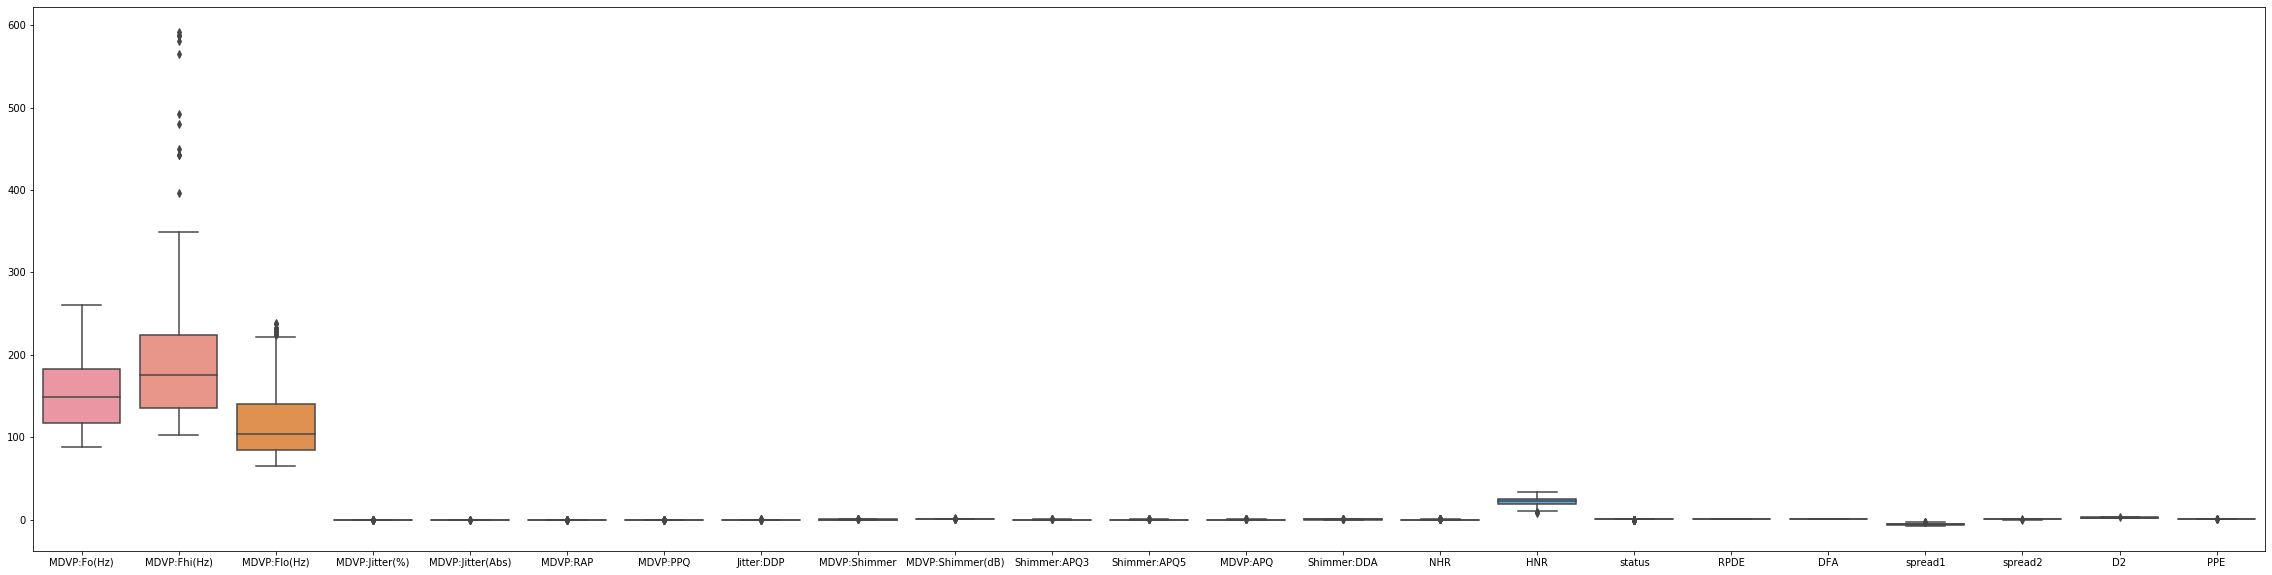

In [85]:
plt.figure(figsize=(40,10))
sns.boxplot(data = df)
plt.show()

In [5]:
from scipy import stats
z=np.abs(stats.zscore(df['MDVP:Fhi(Hz)']))
threshold=3
print(np.where(z>threshold))

(array([ 73, 102, 115, 120, 149, 186, 187], dtype=int64),)


### The presence of outliers in 'MDVP:Fhi(Hz)' is being ignored given the size and nature of the dataset.  It should not make a significant difference.

In [7]:
skew = df.skew()
kurt = df.kurt()
pd.concat([skew.rename('skewness'), kurt.rename('kurtosis')],axis=1)

,skewness,kurtosis
MDVP:Fo(Hz),0.591737,-0.627898
MDVP:Fhi(Hz),2.542146,7.627241
MDVP:Flo(Hz),1.217350,0.654615
MDVP:Jitter(%),3.084946,12.030939
MDVP:Jitter(Abs),2.649071,10.869043
MDVP:RAP,3.360708,14.213798
MDVP:PPQ,3.073892,11.963922
Jitter:DDP,3.362058,14.224762
MDVP:Shimmer,1.666480,3.238308
MDVP:Shimmer(dB),1.999389,5.128193


#### The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.  This test will be useful to determine how accurately this dataset ( a sample) represents the general population. It is intuitive that in the population, the number of people without the disease outweighs those with the disease quite heavily. Yet, this dataset suggests the opposite.

#### In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

In [4]:
from scipy.stats import shapiro

stat, p = shapiro(df['MDVP:Fhi(Hz)'])
print('Statistic=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistic=0.723, p=0.000
Sample does not look Gaussian


#### This test was applied to those columns that were highly skewed i.e. skewness less than −1 (skewed left) or greater than +1 (skewed right) and with excess kurtosis greater than 0 (leptokurtic - when compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper) or less than 0 (platykurtic- when compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader). 

The results are as follows:-

MDVP:Fhi(Hz)    Statistic=0.723, p=0.000    Sample does not look Gaussian

MDVP:Flo(Hz)    Statistic=0.861, p=0.000    Sample does not look Gaussian

MDVP:Jitter(%)  Statistic=0.684, p=0.000    Sample does not look Gaussian

MDVP:Jitter(Abs) Statistic=0.767, p=0.000   Sample does not look Gaussian

MDVP:RAP        Statistic=0.648, p=0.000    Sample does not look Gaussian

MDVP:PPQ        Statistic=0.681, p=0.000    Sample does not look Gaussian

Jitter:DDP      Statistic=0.648, p=0.000    Sample does not look Gaussian

MDVP:Shimmer    Statistic=0.836, p=0.000    Sample does not look Gaussian

Shimmer:APQ3    Statistic=0.847, p=0.000    Sample does not look Gaussian

Shimmer:APQ5    Statistic=0.812, p=0.000    Sample does not look Gaussian

MDVP:APQ        Statistic=0.763, p=0.000    Sample does not look Gaussian

Shimmer:DDA     Statistic=0.847, p=0.000    Sample does not look Gaussian

NHR             Statistic=0.523, p=0.000    Sample does not look Gaussian

### These findings could be attributed to a relatively small dataset with insufficient data that gives the appearance of a scattered distribution, thought the Shapiro - Wilk test suggests otherwise. If a process has many values close to zero or a natural limit, the data distribution will skew to the right or left.  This could also be the case in this dataset.

In [15]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. This dataset contains data from voice recordings of 23 subjects with PD and 8 control subjects.It is interesting that the data is imbalanced towards that class which is important to us. The idea is to predict patients with Parkinsons (positives) accurately, for sure.  

### Yet, the objective of this project is also clear that both people with the disease as well as people without must be identified correctly. 

### This disease detection problem is an imbalanced classification problem where the choices are disease or no disease. Now, in a population, the number of people without Parkinsons Disease is obviously far more than the number of people with the disease. Yet, we are presented with a database where the number of positives outweighs the negatives.

### Classically in such a problem, had the database been large, the focus would have shifted from the accuracy metric to other metrics like recall, precision or both (f1). However, in this skewed dataset, accuracy as a metric may still be a good choice to evaluate model effectiveness. But average precision score and f1 are important balancing  parameters, given the project's objective to identify both classes accurately.

### The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient. [source: Wikipedia].  This metric will also be evaluated for various models.

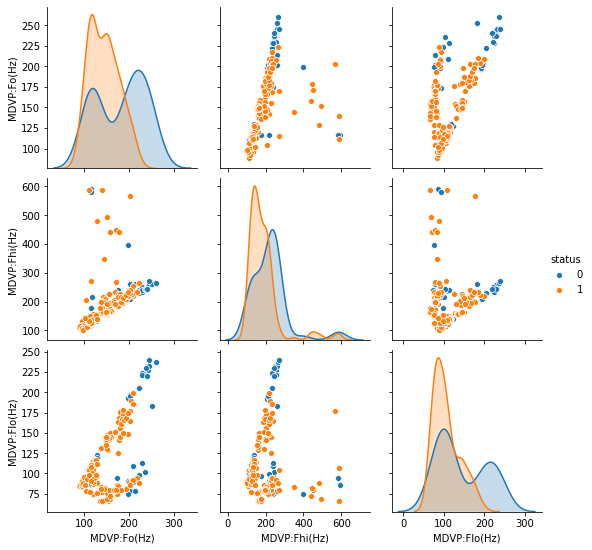

In [22]:
sns.pairplot(df[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'status']], hue = 'status');
# Parameters of vocal fundamental frequency

A general positive correlation between the parameters of vocal fundamental frequency is discernable. Outliers can be noticed.

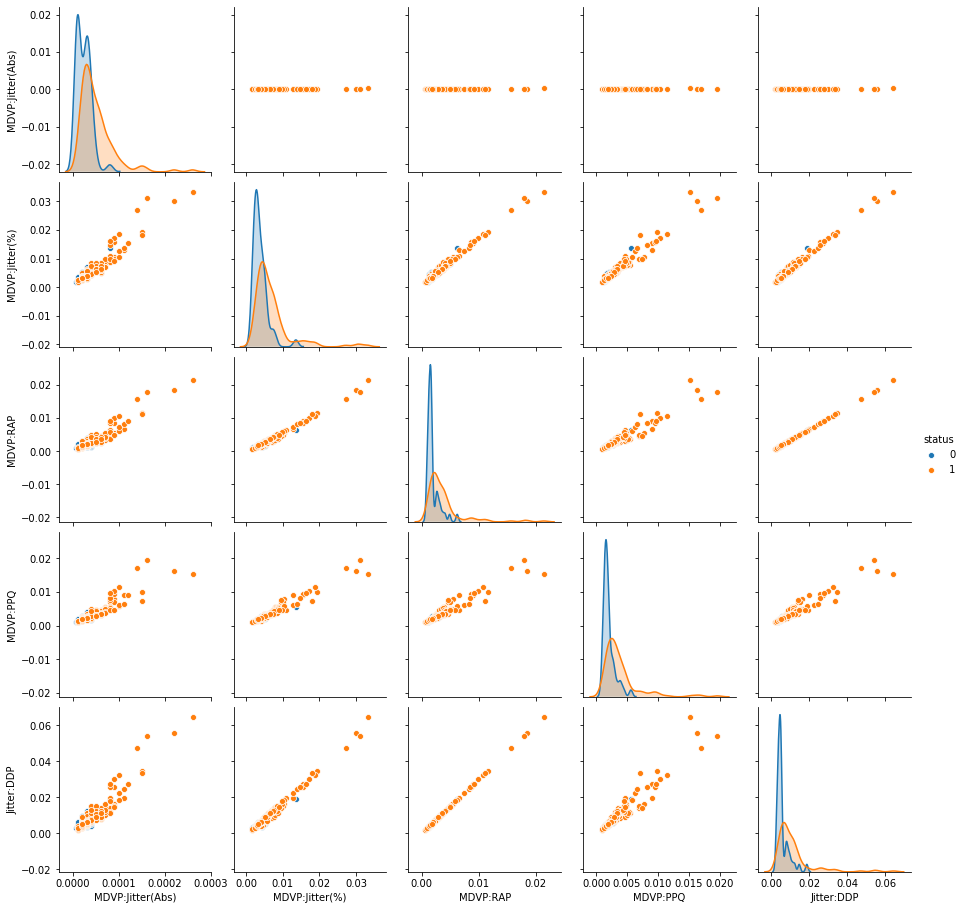

In [23]:
sns.pairplot(df[['MDVP:Jitter(Abs)', 'MDVP:Jitter(%)', 'MDVP:RAP','MDVP:PPQ', 'Jitter:DDP', 'status']], hue = 'status');
# Measures of variation in fundamental frequency

MDVP:Jitter(Abs) does not seem to be correlated with any of the other measures of variation in fundamental frequency. All the other variables appear to be positively correlated.                         

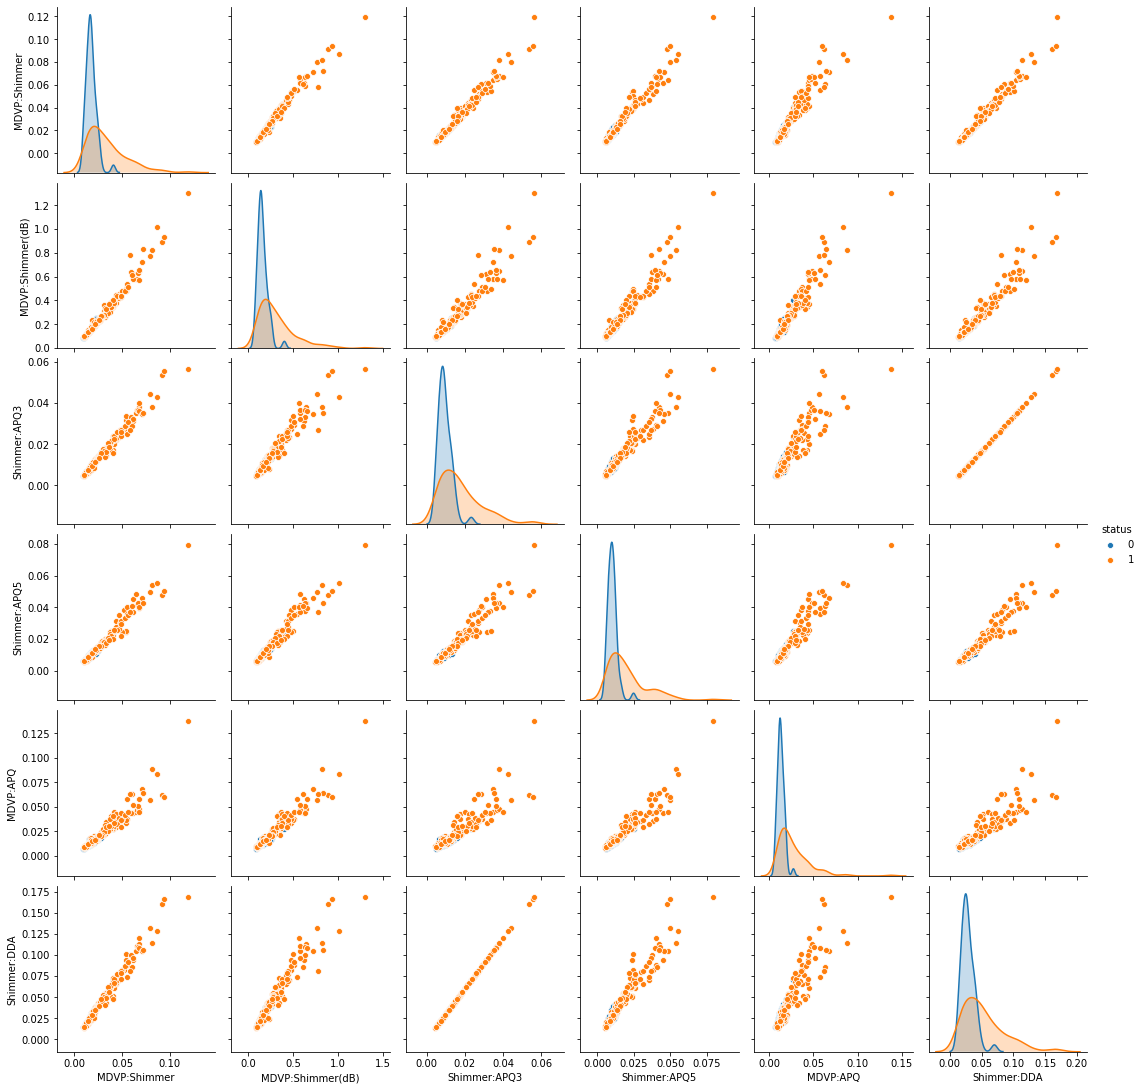

In [26]:
sns.pairplot(df[['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:APQ5', 'MDVP:APQ','Shimmer:DDA', 'status']], hue = 'status');
# Measures of variation in amplitude

A clear positive correlation between the measures of variation in amplitude is evident.

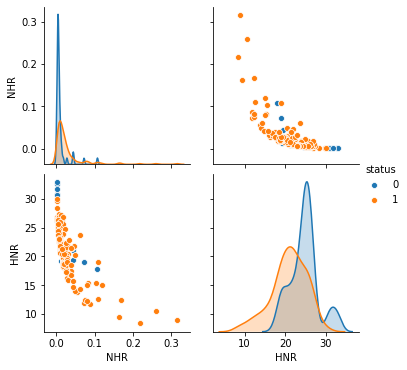

In [27]:
sns.pairplot(df[['NHR', 'HNR', 'status']], hue = 'status');
# Measures of ratio of noise to tonal components in voice

The negative correlation between the measures of ratio of noise to tonal components in voice is clear.

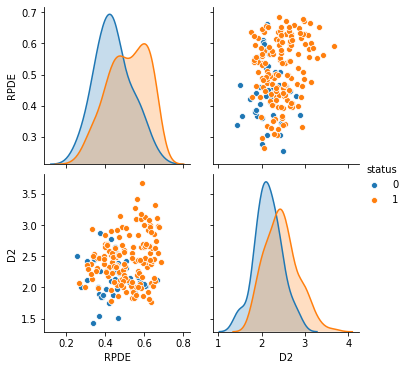

In [28]:
sns.pairplot(df[['RPDE', 'D2', 'status']], hue = 'status');
# Non linear dynamic complexity measures

Both the measures are reasonably positively correlated.

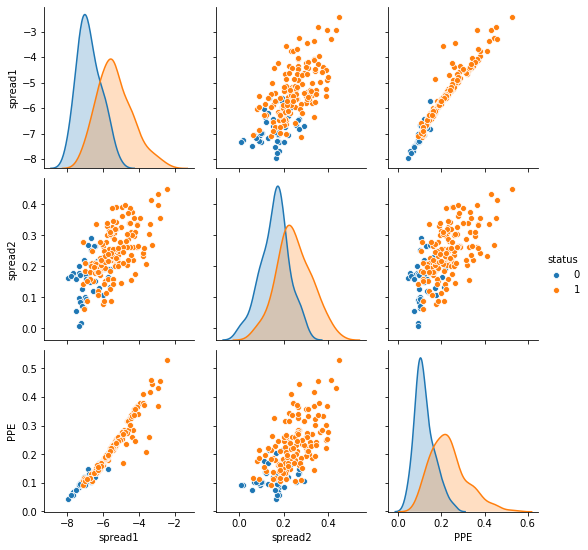

In [29]:
sns.pairplot(df[['spread1', 'spread2', 'PPE', 'status']], hue = 'status');
# Non linear measures of fundamental frequency

#### The measures are positively correlated. It is very encouraging that these trends are seen as it means that the problem statement can be solved as machine learning techniques develop and more data is gathered.

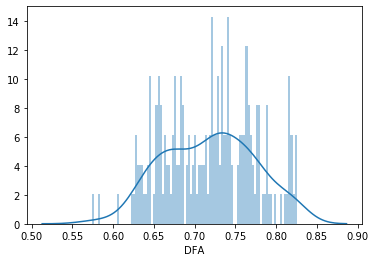

In [36]:
sns.distplot(df['DFA'],bins=100)

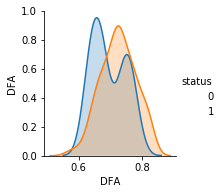

In [40]:
sns.pairplot(df[['DFA', 'status']], hue = 'status');
# Signal fractal scaling exponent

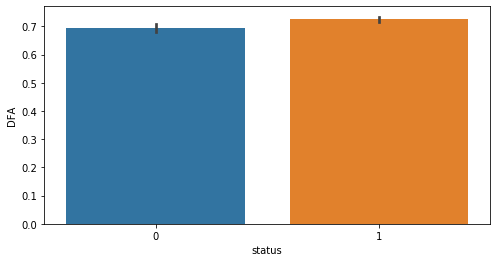

In [41]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="status", y="DFA", data=df)

## Splitting the dataset and preparing it

In [4]:
from sklearn.model_selection import train_test_split

x = df.drop('status',axis=1) # x axis without the target variable     
y = df['status']   # target variable on y axis

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# 1 - random seed number

x_train.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
148,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,0.722,...,0.06824,0.10422,0.08069,12.298,0.552870,0.764036,-3.377325,0.335357,3.274865,0.418646
43,241.404,248.834,232.483,0.00281,0.00001,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
52,128.001,138.052,122.080,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.210,...,0.01677,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308
15,142.167,217.455,83.159,0.00369,0.00003,0.00157,0.00203,0.00471,0.01503,0.126,...,0.01359,0.02316,0.00839,25.175,0.565924,0.658245,-5.340115,0.210185,2.205546,0.234589
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,...,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730


In [5]:
# Scaling training data set test data using MinMaxScaler to preserve data shape. Dataset is not normally distributed.
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

The Min Max scaler is preferred over the Standard Scaler and the Robust Scaler in this case as it is important to preserve data shape without distortion. As the dataset is clearly not normal, the StandardScaler is not a good choice. While there are outliers, they aren't adequate to justify the use of a robust scaler.

In [30]:
print(x_train_scaled)

[[0.94729509 0.29635731 0.95655272 ... 0.20794698 0.44199704 0.10457761]
 [0.51181152 0.26544189 0.06063818 ... 0.96360579 0.70474601 0.79997225]
 [0.20498546 0.05923227 0.2892753  ... 0.65921764 0.33999906 0.64875276]
 ...
 [0.20198248 0.07668126 0.27383283 ... 0.72665059 0.3477682  0.29749932]
 [0.52192751 0.34018392 0.08423    ... 0.88126577 0.68532138 0.48192731]
 [0.55884131 0.17036447 0.58732867 ... 0.42793532 0.4952426  0.26651106]]


In [31]:
print("{0:0.2f}% Data in training set".format((len(x_train)/len(df.index)) * 100)) # Check the data split.
print("{0:0.2f}% Data in test set".format((len(x_test)/len(df.index)) * 100))

69.74% Data in training set
30.26% Data in test set


In [32]:
print("Original PD positive   : {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 1]), (len(df.loc[df['status'] == 1])/len(df.index)) * 100))
print("Original PD negative   : {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 0]), (len(df.loc[df['status'] == 0])/len(df.index)) * 100))
print("")
print("Training PD positive   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training PD negative   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test PD positive      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test PD negative      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original PD positive   : 147 (75.38%)
Original PD negative   : 48 (24.62%)

Training PD positive   : 107 (78.68%)
Training PD negative   : 29 (21.32%)

Test PD positive      : 40 (67.80%)
Test PD negative      : 19 (32.20%)



## Standard Classification Algorithms

In [33]:
model = LogisticRegression(max_iter=100000000) # Logistic Regression
model.fit(x_train_scaled, y_train)
pred_train = model.predict(x_train_scaled)
train_accuracy=accuracy_score(y_train, pred_train)
print('Training Accuracy: ',np.round(train_accuracy,5))
print()
y_pred = model.predict(x_test_scaled)
test_accuracy=accuracy_score(y_test, y_pred)
print('Test Accuracy: ',np.round(test_accuracy,5))
print()
print("Classification Report")
print(classification_report(y_test, y_pred, digits=5))

Training Accuracy:  0.875

Test Accuracy:  0.79661

Classification Report
              precision    recall  f1-score   support

           0    1.00000   0.36842   0.53846        19
           1    0.76923   1.00000   0.86957        40

    accuracy                        0.79661        59
   macro avg    0.88462   0.68421   0.70401        59
weighted avg    0.84355   0.79661   0.76294        59



In [9]:
kNN = KNeighborsClassifier() # kNN
kNN.fit(x_train_scaled, y_train)
kNN_train_pred = kNN.predict(x_train_scaled)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, kNN_train_pred)))
print()
kNN_test_pred = kNN.predict(x_test_scaled)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, kNN_test_pred)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, kNN_test_pred, labels=[1, 0]))

Training Accuracy: 0.95588

Test Accuracy: 0.84746

Classification Report
              precision    recall  f1-score   support

           1       0.82      1.00      0.90        40
           0       1.00      0.53      0.69        19

    accuracy                           0.85        59
   macro avg       0.91      0.76      0.79        59
weighted avg       0.88      0.85      0.83        59



Maximum accuracy:- 0.9491525423728814 at K = 1


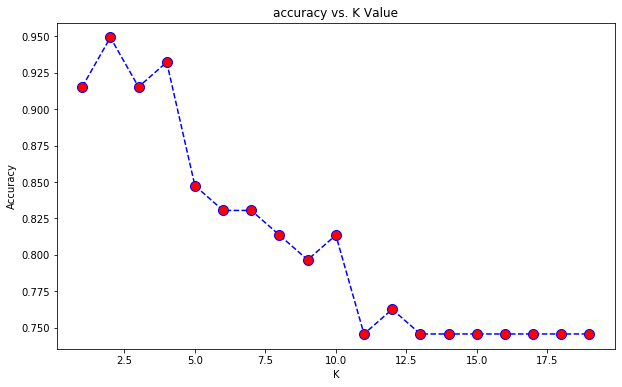

In [80]:
acc = []
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train_scaled,y_train)
    yhat = neigh.predict(x_test_scaled)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Minimum error:- 0.05084745762711865 at K = 1


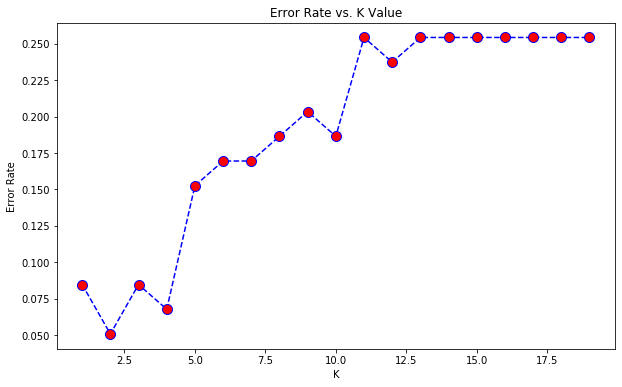

In [82]:
error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train_scaled,y_train)
 pred_i = knn.predict(x_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))


In [11]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
weights = ['uniform','distance']
metric=['euclidean','manhattan', 'minkowski']
hyperparameters = dict(leaf_size=leaf_size, weights=weights, n_neighbors=n_neighbors, metric=metric)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=5, verbose =0, n_jobs=-1)
best_model = clf.fit(x_train_scaled,y_train)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best metric:', best_model.best_estimator_.get_params()['metric'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best weight:', best_model.best_estimator_.get_params()['weights'])
clf_predictions = clf.predict(x_test_scaled)
print(classification_report(y_test, clf_predictions)) 

Best leaf_size: 1
Best metric: manhattan
Best n_neighbors: 1
Best weight: uniform
              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.89      1.00      0.94        40

    accuracy                           0.92        59
   macro avg       0.94      0.87      0.89        59
weighted avg       0.92      0.92      0.91        59



k values were evaluated for accuracy and error rate to arrive at the optimum value. In this case, accuracy was maximised when k = 1. This was validated using Grid Search CV for hyperparameter tuning as well. However, clearly the kNN model is over-fitting the training data.

In [55]:
NB_model = GaussianNB()  # Naive Bayes
NB_model.fit(x_train_scaled, y_train.ravel())
NB_train_model_pred = NB_model.predict(x_train_scaled)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, NB_train_model_pred)))
print()
NB_test_model_pred = NB_model.predict(x_test_scaled)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, NB_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, NB_test_model_pred, labels=[1, 0]))

Training Accuracy: 0.72059

Test Accuracy: 0.72881

Classification Report
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        40
           0       0.58      0.58      0.58        19

    accuracy                           0.73        59
   macro avg       0.69      0.69      0.69        59
weighted avg       0.73      0.73      0.73        59



In [7]:
svc_model = SVC() # SVM
svc_model.fit(x_train_scaled, y_train)
svc_train_model_pred = svc_model.predict(x_train_scaled)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, svc_train_model_pred)))
print()
svc_test_model_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, svc_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, svc_test_model_pred, labels=[1, 0]))

Training Accuracy: 0.90441

Test Accuracy: 0.79661

Classification Report
              precision    recall  f1-score   support

           1       0.77      1.00      0.87        40
           0       1.00      0.37      0.54        19

    accuracy                           0.80        59
   macro avg       0.88      0.68      0.70        59
weighted avg       0.84      0.80      0.76        59



In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf','poly','linear']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0, n_jobs=-1) 
grid.fit(x_train_scaled, y_train) 
print(grid.best_params_) 
print(grid.best_estimator_) 
grid_predictions = grid.predict(x_test_scaled) 
print(classification_report(y_test, grid_predictions)) 

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.92      0.90      0.91        40

    accuracy                           0.88        59
   macro avg       0.86      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59



The SVM model was evaluated for different kernel types. Gridsearch CV revealed the optimum C and Gamma values for this dataset. The model is overfitting training data.

Training Accuracy: 0.9779

Test Accuracy: 0.8983

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.95      0.93        40
           0       0.88      0.79      0.83        19

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



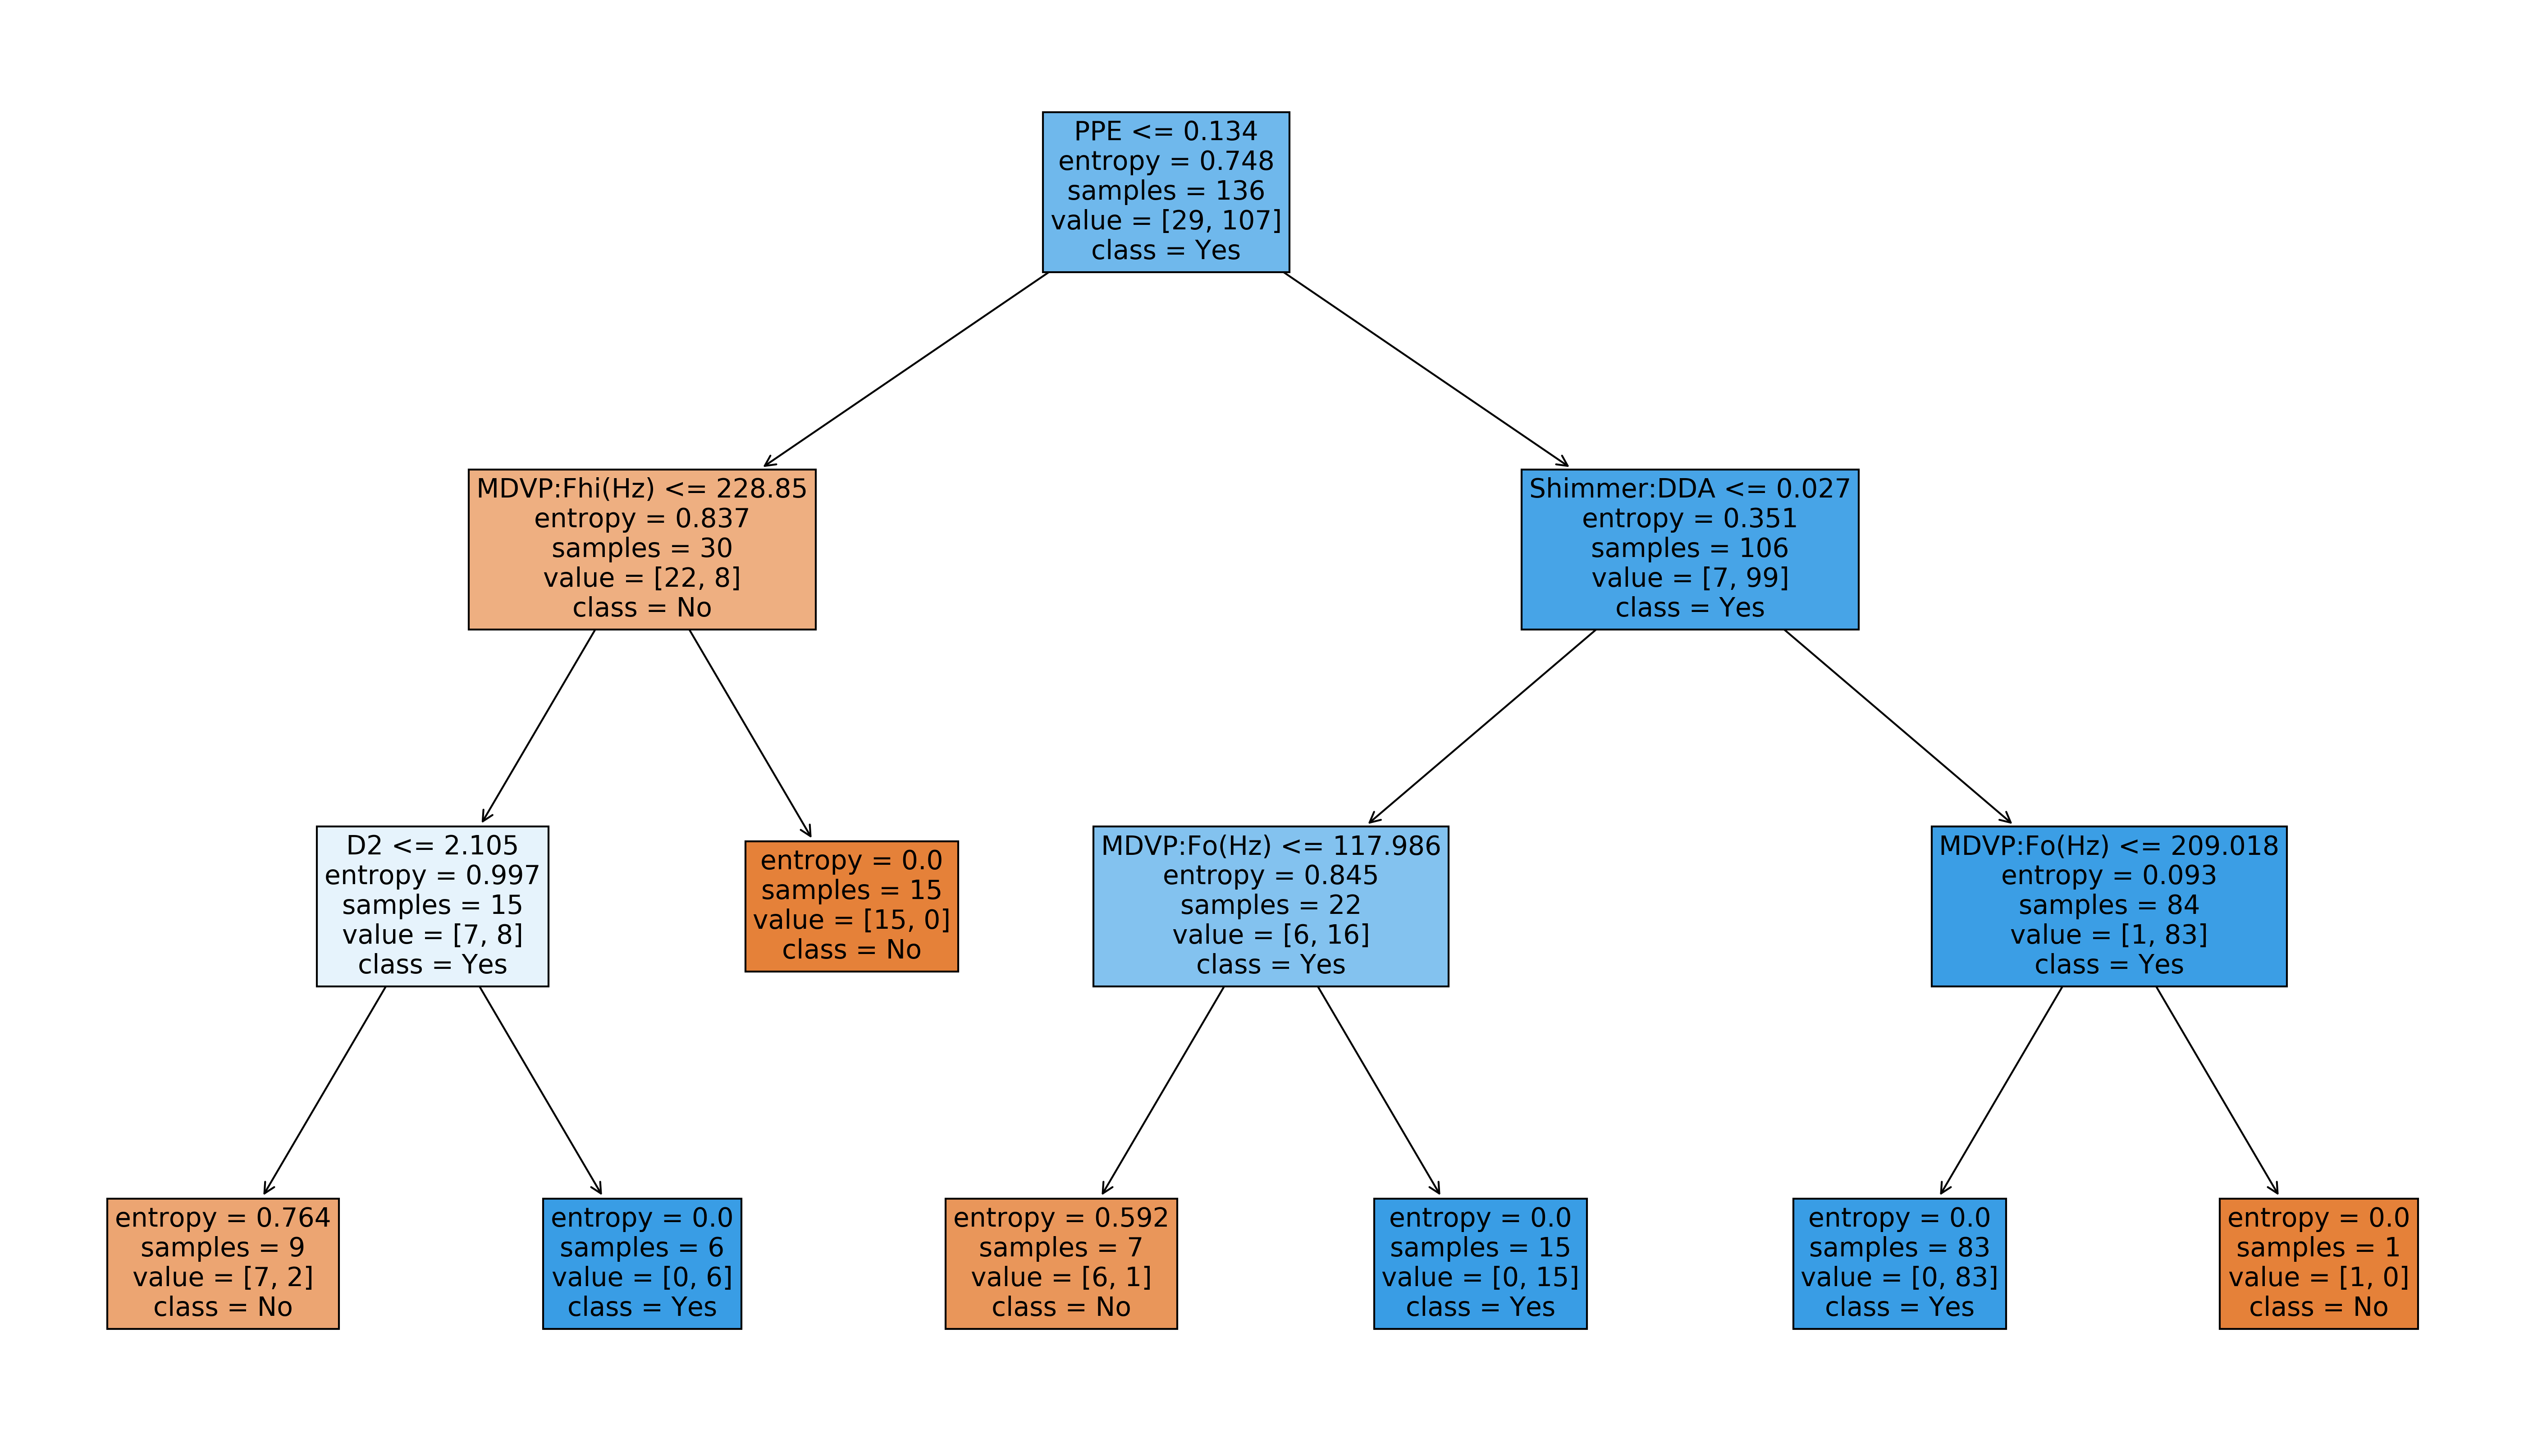

In [9]:
dTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1, min_samples_leaf=int(len(x_train)*0.01), 
                                   min_samples_split=int(len(x_train)*0.03)) # Decision Tree - manually tuned
dTree.fit(x_train, y_train)
dTree_train_model_pred = dTree.predict(x_train)
print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, dTree_train_model_pred)))
print()
dTree_test_model_pred = dTree.predict(x_test)
print("Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dTree_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, dTree_test_model_pred, labels=[1, 0]))
fn = list(x_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24, 14), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True, fontsize = 14)

fig.savefig('PDtree.png')

In [6]:
algo=[]
algo.append(('lr',LogisticRegression()))
algo.append(('knn',KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='manhattan', leaf_size=1)))
algo.append(('nb',GaussianNB()))
algo.append(('svc',SVC(C= 100, kernel='rbf', gamma= 1)))
algo.append(('dt',DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1, min_samples_leaf=int(len(x_train)*0.01), 
                                   min_samples_split=int(len(x_train)*0.03))))

In [7]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='accuracy')
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 

lr : 0.855605 (0.077804)
knn : 0.852368 (0.066434)
nb : 0.711368 (0.101464)
svc : 0.753947 (0.018655)
dt : 0.839632 (0.070772)


Both stratified k-fold and simple k-fold cv yielded the same results. 

### Thus, till now the three most accurate standard classification algorithms for this dataset are Logistic Regression, kNN and Decision Tree.

# Ensemble Techniques - Bagging

In [7]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(x_train, y_train)
rfcl_train_model_pred = rfcl.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, rfcl_train_model_pred)))
print()
rfcl_test_model_pred = rfcl.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, rfcl_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, rfcl_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.83051

Classification Report
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        40
           0       1.00      0.47      0.64        19

    accuracy                           0.83        59
   macro avg       0.90      0.74      0.77        59
weighted avg       0.86      0.83      0.81        59



In [15]:
rfcl

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 25, 50, 100, 120],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [100, 110, 120, 130, 140],
    'criterion':['gini']
}
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)

grid_search.fit(x_train, y_train)
rfcl_grid_train_model_pred = grid_search.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, rfcl_grid_train_model_pred)))
print()
rfcl_grid_test_model_pred = grid_search.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, rfcl_grid_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, rfcl_grid_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.83051

Classification Report
              precision    recall  f1-score   support

           1       0.81      0.97      0.89        40
           0       0.91      0.53      0.67        19

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



In [17]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [8]:
from sklearn.ensemble import ExtraTreesClassifier  # Extra Trees Classifier

Xtree_forest = ExtraTreesClassifier() 
Xtree_forest = Xtree_forest.fit(x_train, y_train)
Xtree_forest_train_model_pred = Xtree_forest.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, Xtree_forest_train_model_pred)))
print()
Xtree_forest_test_model_pred = Xtree_forest.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, Xtree_forest_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, Xtree_forest_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.86441

Classification Report
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.58      0.73        19

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



In [8]:
Xtree_forest

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [1, 5, 10, 25, 50, 100, 120],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [3, 4, 5],
    'n_estimators': [10, 25, 100, 110, 120, 130, 140],
    'criterion':['gini','entropy']
}
Xtree_search = GridSearchCV(estimator = Xtree_forest, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)

Xtree_search.fit(x_train, y_train)
Xtree_grid_train_model_pred = Xtree_search.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, Xtree_grid_train_model_pred)))
print()
Xtree_grid_test_model_pred = Xtree_search.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, Xtree_grid_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, Xtree_grid_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.86441

Classification Report
              precision    recall  f1-score   support

           1       0.83      1.00      0.91        40
           0       1.00      0.58      0.73        19

    accuracy                           0.86        59
   macro avg       0.92      0.79      0.82        59
weighted avg       0.89      0.86      0.85        59



In [12]:
Xtree_search.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 10}

In [46]:
algo=[]
algo.append(('lr',LogisticRegression()))
algo.append(('knn',KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='manhattan', leaf_size=1)))
algo.append(('nb',GaussianNB()))
algo.append(('svc',SVC(C= 100, kernel='rbf', gamma= 1)))
algo.append(('dt',DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1, min_samples_leaf=int(len(x_train)*0.01), 
                                   min_samples_split=int(len(x_train)*0.03))))
algo.append(('rf',RandomForestClassifier(criterion = 'gini', max_depth = 100, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)))
algo.append(('Xtree',ExtraTreesClassifier(criterion = 'gini', max_depth = 25, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)))


In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='accuracy',n_jobs=-1)
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 

lr : 0.855605 (0.077804)
knn : 0.852368 (0.066434)
nb : 0.711368 (0.101464)
svc : 0.753947 (0.018655)
dt : 0.839632 (0.070772)
rf : 0.907184 (0.067225)
Xtree : 0.919947 (0.057440)


Initially, both Randomized and Grid search CV were run a few times for both the RF and Extra Trees classifiers.  The optimum parameters were thereafter manually selected to get the best results through k-fold CV.

#### Between the two bagging techniques, Extra Trees Classifier is better than Random Forest Classifier.

# Ensemble Techniques - Boosting

In [66]:
from sklearn.ensemble import AdaBoostClassifier    # Adaptive Boosting Classifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(x_train, y_train)
AdaBoost_train_model_pred = AdaBoost.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, AdaBoost_train_model_pred)))
print()
AdaBoost_test_model_pred = AdaBoost.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, AdaBoost_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, AdaBoost_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.89831

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.95      0.93        40
           0       0.88      0.79      0.83        19

    accuracy                           0.90        59
   macro avg       0.89      0.87      0.88        59
weighted avg       0.90      0.90      0.90        59



In [27]:
AdaBoost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth = i) for i in range(1,6)],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 1.0],
    'n_estimators': [10, 25, 50, 100, 110, 120, 130, 140],
    'random_state':[1]
}
AdaBoost_search = GridSearchCV(estimator = AdaBoost, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)

AdaBoost_search.fit(x_train, y_train)
AdaBoost_grid_train_model_pred = AdaBoost_search.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, AdaBoost_grid_train_model_pred)))
print()
AdaBoost_grid_test_model_pred = AdaBoost_search.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, AdaBoost_grid_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, AdaBoost_grid_test_model_pred, labels=[1, 0]))
print("Matthews Correlation Coefficient (MCC)")
print(matthews_corrcoef(y_test, y_pred))

Training Accuracy: 1.00000

Test Accuracy: 0.88136

Classification Report
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           0       1.00      0.63      0.77        19

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



In [29]:
AdaBoost_search.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=2, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': 1}

In [11]:
from sklearn.ensemble import GradientBoostingClassifier    # Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB = GB.fit(x_train, y_train)
GB_train_model_pred = GB.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, GB_train_model_pred)))
print()
GB_test_model_pred = GB.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, GB_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, GB_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.86441

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.95      0.90        40
           0       0.87      0.68      0.76        19

    accuracy                           0.86        59
   macro avg       0.87      0.82      0.83        59
weighted avg       0.86      0.86      0.86        59



In [7]:
GB

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.15,0.1,0.01],
    'n_estimators': [90, 100, 110, 120],
    'max_depth':[2, 3, 4],
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split':[2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.8, 0.9, 1],
    'random_state':[1]
}

GB_search = GridSearchCV(estimator = GB, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)

GB_search.fit(x_train, y_train)
GB_grid_train_model_pred = GB_search.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, GB_grid_train_model_pred)))
print()
GB_grid_test_model_pred = GB_search.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, GB_grid_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, GB_grid_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.86441

Classification Report
              precision    recall  f1-score   support

           1       0.85      0.97      0.91        40
           0       0.92      0.63      0.75        19

    accuracy                           0.86        59
   macro avg       0.89      0.80      0.83        59
weighted avg       0.87      0.86      0.86        59



In [12]:
GB_search.best_params_

{'learning_rate': 0.15,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 90,
 'random_state': 1,
 'subsample': 0.8}

In [13]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB = XGB.fit(x_train, y_train)
XGB_train_model_pred = XGB.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, XGB_train_model_pred)))
print()
XGB_test_model_pred = XGB.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, XGB_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, XGB_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.88136

Classification Report
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        40
           0       1.00      0.63      0.77        19

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



In [14]:
XGB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'eta': [0.01,0.1,0.15,0.2,0.3],
    'min_child_weight': [1,3,5],
    'gamma': [0],
    'subsample':[1, 0.6, 0.4],
    'colsample_bytree':[0.3, 0.8, 1.0],
    'max_depth': [3,4,5,6],
    'learning rate':[0.01,0.1,0.15],
    'n_estimators':[100,110],
    'random_state':[1]
}

XGB_search = GridSearchCV(estimator = XGB, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 0)

XGB_search.fit(x_train, y_train)
XGB_grid_train_model_pred = XGB_search.predict(x_train)
print("Training Accuracy: {0:.5f}".format(metrics.accuracy_score(y_train, XGB_grid_train_model_pred)))
print()
XGB_grid_test_model_pred = XGB_search.predict(x_test)
print("Test Accuracy: {0:.5f}".format(metrics.accuracy_score(y_test, XGB_grid_test_model_pred, normalize=True)))
print()
print("Classification Report")
print(metrics.classification_report(y_test, XGB_grid_test_model_pred, labels=[1, 0]))


Training Accuracy: 1.00000

Test Accuracy: 0.88136

Classification Report
              precision    recall  f1-score   support

           1       0.87      0.97      0.92        40
           0       0.93      0.68      0.79        19

    accuracy                           0.88        59
   macro avg       0.90      0.83      0.85        59
weighted avg       0.89      0.88      0.88        59



In [23]:
XGB_search.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.01,
 'gamma': 0,
 'learning rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 100,
 'random_state': 1,
 'subsample': 1}

In [58]:
algo=[]
algo.append(('lr',LogisticRegression()))
algo.append(('knn',KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='manhattan', leaf_size=1)))
algo.append(('nb',GaussianNB()))
algo.append(('svc',SVC(C= 100, kernel='rbf', gamma= 1)))
algo.append(('dt',DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1, min_samples_leaf=int(len(x_train)*0.01), 
                                   min_samples_split=int(len(x_train)*0.03))))
algo.append(('rf',RandomForestClassifier(criterion = 'gini', max_depth = 100, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)))
algo.append(('Xtree',ExtraTreesClassifier(criterion = 'gini', max_depth = 25, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)))
algo.append(('Ada',AdaBoostClassifier(algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1, min_samples_leaf=int(len(x_train)*0.01), 
                                   min_samples_split=int(len(x_train)*0.03)), learning_rate=1.0,
                                   n_estimators=100)))
algo.append(('GB',GradientBoostingClassifier(learning_rate= 0.15, max_depth= 3, max_features= 'auto', min_samples_leaf= 1,
                                     min_samples_split= 3, n_estimators= 100, random_state= 1, subsample= 0.8)))
algo.append(('XGB',XGBClassifier(learning_rate= 0.1, max_depth= 3, colsample_bytree = 0.8, min_child_weight= 1,
                                     eta = 0.01, n_estimators= 100, random_state= 1, subsample= 1)))


In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='accuracy',n_jobs=-1)
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 

lr : 0.855605 (0.077804)
knn : 0.852368 (0.066434)
nb : 0.711368 (0.101464)
svc : 0.753947 (0.018655)
dt : 0.839632 (0.070772)
rf : 0.907184 (0.067225)
Xtree : 0.919947 (0.057440)
Ada : 0.931921 (0.057170)
GB : 0.925711 (0.055572)
XGB : 0.920105 (0.062029)


Among the boosting techniques, Ada Boosting is better than Gradient boosting and XGB, but not by too much.

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='recall',n_jobs=-1)
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 


lr : 0.943952 (0.067239)
knn : 0.897238 (0.068413)
nb : 0.639429 (0.128298)
svc : 1.000000 (0.000000)
dt : 0.886619 (0.085326)
rf : 0.968333 (0.053360)
Xtree : 0.972952 (0.044878)
Ada : 0.968048 (0.045337)
GB : 0.973619 (0.041537)
XGB : 0.970952 (0.048760)


In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='precision',n_jobs=-1)
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 


lr : 0.877969 (0.061658)
knn : 0.910459 (0.061616)
nb : 0.966777 (0.055712)
svc : 0.753947 (0.018655)
dt : 0.905127 (0.064191)
rf : 0.917195 (0.057723)
Xtree : 0.928298 (0.055479)
Ada : 0.946724 (0.051160)
GB : 0.933894 (0.052220)
XGB : 0.929302 (0.053601)


In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold   # Using stratified k-fold cross validation with repetition.
from sklearn.model_selection import cross_val_score
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
model=[]
pred=[]
for name,model in algo:
    fold=RepeatedStratifiedKFold(n_splits=10,random_state=1)
    result=cross_val_score(model,x,y,cv=fold,scoring='f1',n_jobs=-1)
    pred.append(result)
    tally="%s : %f (%f)"%(name,result.mean(),result.std())
    print(tally) 


lr : 0.907881 (0.050376)
knn : 0.901275 (0.044887)
nb : 0.762471 (0.099917)
svc : 0.859587 (0.011984)
dt : 0.891967 (0.049772)
rf : 0.940588 (0.042762)
Xtree : 0.948679 (0.036338)
Ada : 0.959601 (0.035412)
GB : 0.952209 (0.035277)
XGB : 0.948469 (0.039983)


In [109]:
model=[]
pred=[]
for name,model in algo:
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    Avg = average_precision_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    print('%s: Average Precision Score=%f, Matthews Correlation Coefficient (MCC)=%f' % (name, Avg, MCC))    

lr: Average Precision Score=0.769231, Matthews Correlation Coefficient (MCC)=0.532354
knn: Average Precision Score=0.888889, Matthews Correlation Coefficient (MCC)=0.809303
nb: Average Precision Score=0.775593, Matthews Correlation Coefficient (MCC)=0.378947
svc: Average Precision Score=0.898566, Matthews Correlation Coefficient (MCC)=0.732529
dt: Average Precision Score=0.772144, Matthews Correlation Coefficient (MCC)=0.421270
rf: Average Precision Score=0.784314, Matthews Correlation Coefficient (MCC)=0.574663
Xtree: Average Precision Score=0.784314, Matthews Correlation Coefficient (MCC)=0.574663
Ada: Average Precision Score=0.800000, Matthews Correlation Coefficient (MCC)=0.615587
GB: Average Precision Score=0.833333, Matthews Correlation Coefficient (MCC)=0.694591
XGB: Average Precision Score=0.816327, Matthews Correlation Coefficient (MCC)=0.655474


In [8]:
x = PrettyTable()

x.field_names = ["Model", "Accuracy", "Recall", "Precision", "f1", "Average Precision Score","MCC"]

x.add_row(["Logistic Regression", 0.855605, 0.943952, 0.877969, 0.907881,0.769231,0.532354])
x.add_row(["kNN", 0.852368, 0.897238, 0.910459, 0.901275,0.888889,0.809303])
x.add_row(["Naive Bayes", 0.711368, 0.639429, 0.966777, 0.762471,0.775593,0.378947])
x.add_row(["SVM", 0.753947, 1.000000, 0.753947, 0.859587,0.898566,0.732529])
x.add_row(["Decision Tree", 0.839632, 0.886619, 0.905127, 0.891967,0.772144,0.421270])
x.add_row(["Random Forest", 0.907184, 0.968333, 0.917195, 0.940588,0.784314,0.574663])
x.add_row(["Extra Trees", 0.919947, 0.972952, 0.928298, 0.948679,0.784314,0.574663])
x.add_row(["Adaptive Boosting", 0.931921, 0.968048, 0.946724, 0.959601,0.833333,0.615587])
x.add_row(["Gradient Boosting", 0.925711, 0.973619, 0.933894, 0.952209,0.833333,0.694591])
x.add_row(["Extreme Gradient Boosting", 0.920105, 0.970952, 0.929302, 0.948469,0.816327,0.655474])
print(x)


+---------------------------+----------+----------+-----------+----------+-------------------------+----------+
|           Model           | Accuracy |  Recall  | Precision |    f1    | Average Precision Score |   MCC    |
+---------------------------+----------+----------+-----------+----------+-------------------------+----------+
|    Logistic Regression    | 0.855605 | 0.943952 |  0.877969 | 0.907881 |         0.769231        | 0.532354 |
|            kNN            | 0.852368 | 0.897238 |  0.910459 | 0.901275 |         0.888889        | 0.809303 |
|        Naive Bayes        | 0.711368 | 0.639429 |  0.966777 | 0.762471 |         0.775593        | 0.378947 |
|            SVM            | 0.753947 |   1.0    |  0.753947 | 0.859587 |         0.898566        | 0.732529 |
|       Decision Tree       | 0.839632 | 0.886619 |  0.905127 | 0.891967 |         0.772144        | 0.42127  |
|       Random Forest       | 0.907184 | 0.968333 |  0.917195 | 0.940588 |         0.784314        | 0.5

### It can be inferred that - 

Ensemble techniques have generally outperformed the standard classification algorithms.  However, kNN amd SVM though having low accuracies have high average precision scores and MCC values. 

Amongst the ensemble techniques, boosting techniques are better than bagging techniques.

Extra Trees outperforms Random Forest in both accuracy and f1 scores with comparable average precision score and MCC.

Adaptive Boosting is better than both Gradient Boosting and XGB. It is the best model till now with accuracy around 93% and f1 0.96 and a fairly high average precision score (83%). However, MCC in Adaptive Boosting is lower than the other two techniques.

### As ensemble techniques have outperformed other models, it is possible that stacking may improve accuracy further.  This aspect shall be explored now.

In [105]:
layer_one_estimators = [
                        ('Xtree',ExtraTreesClassifier(bootstrap=True, criterion = 'gini', max_depth = 25, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)),
                        (('knn',make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors= 1 , weights = 'uniform', metric='manhattan', leaf_size=1))))             
                       ]
layer_two_estimators = [
                        ('GB',GradientBoostingClassifier(learning_rate= 0.15, max_depth= 3, max_features= 'auto', min_samples_leaf= 1,
                                     min_samples_split= 3, n_estimators= 100, random_state= 1, subsample= 0.8)),
                        ('rf',RandomForestClassifier(criterion = 'gini', bootstrap=True, max_depth = 100, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3, n_estimators=100, max_features='log2',n_jobs=-1)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1, min_samples_leaf=1, 
                                   min_samples_split=3), learning_rate=1.0, n_estimators=100), cv=10)

clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)
clf.fit(x_train, y_train)
pred_train = clf.predict(x_train)
train_accuracy=accuracy_score(y_train, pred_train)
print('Training Accuracy: ',np.round(train_accuracy,5))
print()
y_pred = clf.predict(x_test)
test_accuracy=accuracy_score(y_test, y_pred)
print('Test Accuracy: ',np.round(test_accuracy,5))
print()
print("Classification Report")
print(classification_report(y_test, y_pred, digits=5))
print("Average Precision Score")
print(average_precision_score(y_test, y_pred))
print("Matthews Correlation Coefficient (MCC)")
print(matthews_corrcoef(y_test, y_pred))

Training Accuracy:  0.99265

Test Accuracy:  0.9322

Classification Report
              precision    recall  f1-score   support

           0    1.00000   0.78947   0.88235        19
           1    0.90909   1.00000   0.95238        40

    accuracy                        0.93220        59
   macro avg    0.95455   0.89474   0.91737        59
weighted avg    0.93837   0.93220   0.92983        59

Average Precision Score
0.9090909090909091
Matthews Correlation Coefficient (MCC)
0.8471737420873575


### The stacked generalisation have given a marginally lower accuracy score than the Adaptive Boosting classifier.  The accuracy varied between 91% and 93% when the stacking model was iterated a few times.  However, the mean precision score of this model is 5% better than Adaptive Boosting, which is very significant. In this disease prediction model, it would mean that out of 100 transactions tagged as positive PD, the stacked generalisation classifier would correctly guess on average 5 cases more than the Adaptive Boosting model.


Text(0.5, 42.0, 'Predicted label')

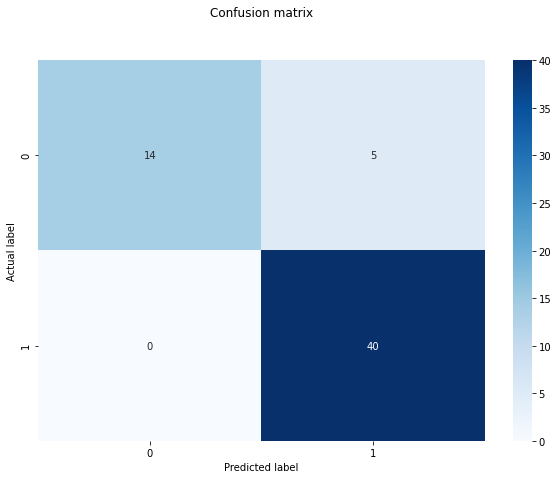

In [64]:
conf_mat = confusion_matrix(y_test, y_pred)
AdaBoost_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(AdaBoost_conf_mat, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 42.0, 'Predicted label')

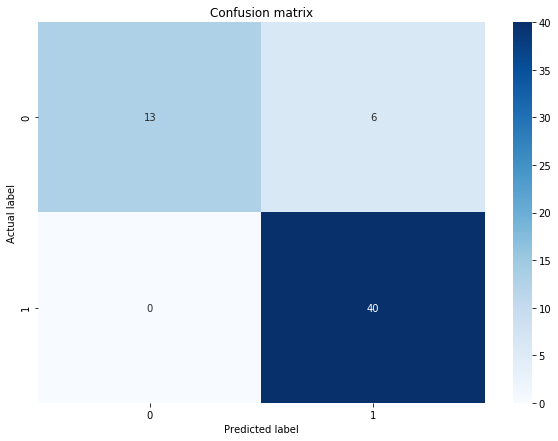

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
clf_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(clf_conf_mat, annot=True,cmap='Blues', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### With no false negatives, both the Ada Boost and Stacking Classifiers are acceptable models. The models did not miss anyone who had Parkinsons Disease.  Yet, the absence of false negatives is to be expected as the majority class are those patients with the disease.  There were only 19 PD negative cases in the test set. However, there were five false positives in the Ada Boost model and six false positives in the stacking classifier. So, almost 26% (Ada Boost) to 32% (Stacking Classifier) of the cases were wrongly classified as false positives in the test set.  This is high.  The only way to mitigate this maybe by increasing the sample size in real life.  Till then, these errors are likely to persist.

Best Threshold=0.527210, G-Mean=0.894


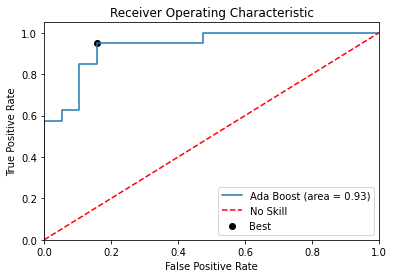

In [68]:
AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

Best Threshold=0.942766, G-Mean=0.936


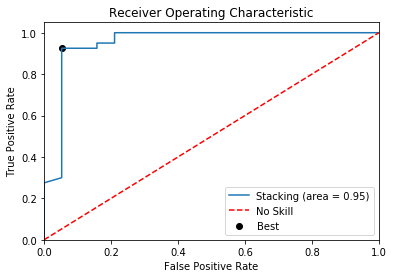

In [19]:
clf_roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stacking (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
gmeans = sqrt(tpr * (1-fpr))
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Stacking_ROC')
plt.show()

### AUC for the Stacked Generalisation model is better than Adaptive Boosting.

Best Threshold=0.527210, F-Score=0.938
AUC=0.966535


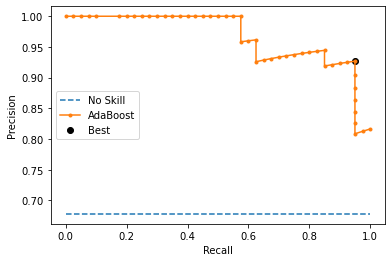

In [101]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve  # Precision Recall Curve
from sklearn.metrics import auc
yhat=AdaBoost.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
fscore = (2 * precision * recall) / (precision + recall)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print('AUC=%f' % metrics.auc(recall,precision))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='AdaBoost')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

Best Threshold=0.682855, F-Score=0.952
AUC=0.912979


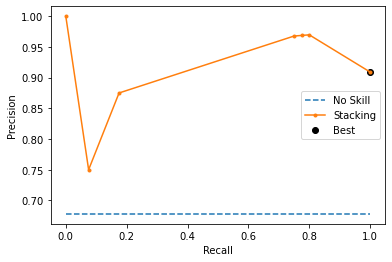

In [102]:
from sklearn.metrics import precision_recall_curve  # Precision Recall Curve
yhat=clf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
fscore = (2 * precision * recall) / (precision + recall)
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print('AUC=%f' % metrics.auc(recall,precision))
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Stacking')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Considering all apects for this dataset, the model of choice in this case is the stacked generalisation. 

This case study has real world applications where ML can predict PD accurately. However, the sample size should ideally be larger and more balanced.

According to studies carried out in 2017 on the same dataset, higher accuracies of the order of 99% were obtained using clustering techniques.

* https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0182428